# *Nedokončeno*

# 3. Operační programy, strategické osy, kofinancování
Nyní se podíváme trochu na rozdělení fondů samotných

In [37]:
import pandas as pd
import numpy as np
%matplotlib inline

## Načítání dat
Data od MMR máme zkombinována s daty of MFČR v souboru `vystupy/projekty-bez-popisu.csv` (můžeme použít i `projekty.csv`, ale ty jsou zbytečně velké pro naše potřeby).

In [38]:
df = pd.read_csv('vystupy/projekty-bez-popisu.csv', low_memory=False)

In [39]:
df.shape

(73446, 18)

In [40]:
# nazvy sloupcu, at se to lip filtruje
prog = 'Program'
ico = 'IČO'
dat = 'Datum'
naz = 'Název'
celk = 'Celkové zdroje'
sml = 'Smlouva'
prop = 'Proplaceno'
zad = 'Žadatel'
prfo = 'Právní forma'
prfok = 'Právní forma (kód)'
nuts = 'NUTS4'
esa = 'ESA'
esak = 'ESA (kód)'
zam = 'Zaměstnanců'
kat = 'Kategorie'
ver = 'Veřejná instituce'

In [41]:
df.loc[:, ico] = [str(j).rjust(8, '0') for j in df.loc[:, ico]]

## Operační programy

In [47]:
opp = df.groupby(prog).sum().loc[:, [celk, sml, prop]]
opp = (opp/10**9).round(2).sort_values(by=sml, ascending=False)
opp

,Celkové zdroje,Smlouva,Proplaceno
Program,,,
CZ.1.01 OP Doprava,266.75,171.35,144.81
CZ.1.02 OP Životní prostředí,224.43,127.29,122.88
CZ.1.03 OP Podnikání a inovace,225.08,95.63,88.92
CZ.1.04 OP Lidské zdroje a zaměstnanost,69.43,58.99,48.00
CZ.1.05 OP Výzkum a vývoj pro inovace,71.43,49.09,46.54
CZ.1.07 OP Vzdělávání pro konkurenceschopnost,56.22,47.78,43.83
CZ.1.06 Integrovaný operační program,58.74,44.26,38.06
CZ.1.10 ROP NUTS II Moravskoslezsko,33.86,22.46,17.67
CZ.1.11 ROP NUTS II Jihovýchod,33.55,22.31,17.88


In [52]:
opp.to_csv('vystupy/tabulky/operacni-programy.csv')

### Podle vlastnictví
Operační programy podle toho, zda jde o peníze pro veřejné podniky nebo ne.

*(Není úplně jasné, jak následující tabulku ukázat, je tam celkem dost informací.)*

In [80]:
oppvs = df.groupby([prog, ver]).sum().loc[:, [celk, sml, prop]]/10**9
oppvs = oppvs.unstack().round(2).swaplevel(0,1,axis=1).sort_index(axis=1)
oppvs

Veřejná instituce                                      False             \
                                              Celkové zdroje Proplaceno   
Program                                                                   
CZ.1.01 OP Doprava                                      0.55       0.17   
CZ.1.02 OP Životní prostředí                           48.11      22.47   
CZ.1.03 OP Podnikání a inovace                        207.15      78.16   
CZ.1.04 OP Lidské zdroje a zaměstnanost                17.54      13.22   
CZ.1.05 OP Výzkum a vývoj pro inovace                   5.95       3.94   
CZ.1.06 Integrovaný operační program                    9.22       4.70   
CZ.1.07 OP Vzdělávání pro konkurenceschopnost          10.32       8.12   
CZ.1.08 OP Technická pomoc                              0.12       0.09   
CZ.1.09 ROP NUTS II Severozápad                         4.35       1.64   
CZ.1.10 ROP NUTS II Moravskoslezsko                     5.11       1.82   
CZ.1.11 ROP NUTS II Jihovýchod                          4.77       1.94   
CZ.1.12 ROP NUTS II Střední Morava                      7.19       2.52   
CZ.1.13 ROP NUTS II Severovýchod                        6.28       2.56   
CZ.1.14 ROP Jihozápad                                   4.25       1.82   
CZ.1.15 ROP NUTS II Střední Čechy                       3.22       1.19   
CZ.1.25 OP Rybářství                                    1.31       0.52   
CZ.2.16 OP Praha Konkurenceschopnost                    1.71       0.85   
CZ.2.17 OP Praha Adaptibilita                           2.15       1.58   
CZ.3.22 OP ČR - Polsko                                  0.03       0.03   

Veřejná instituce                                              True   \
                                              Smlouva Celkové zdroje   
Program                                                                
CZ.1.01 OP Doprava                               0.17         266.20   
CZ.1.02 OP Životní prostředí                    23.07         176.33   
CZ.1.03 OP Podnikání a inovace                  83.51          17.91   
CZ.1.04 OP Lidské zdroje a zaměstnanost         14.89          51.81   
CZ.1.05 OP Výzkum a vývoj pro inovace            4.15          65.48   
CZ.1.06 Integrovaný operační program             5.25          49.52   
CZ.1.07 OP Vzdělávání pro konkurenceschopnost    8.78          45.88   
CZ.1.08 OP Technická pomoc                       0.10           5.01   
CZ.1.09 ROP NUTS II Severozápad                  1.74          24.04   
CZ.1.10 ROP NUTS II Moravskoslezsko              2.17          28.75   
CZ.1.11 ROP NUTS II Jihovýchod                   2.20          28.78   
CZ.1.12 ROP NUTS II Střední Morava               2.72          23.24   
CZ.1.13 ROP NUTS II Severovýchod                 2.70          22.60   
CZ.1.14 ROP Jihozápad                            1.93          24.05   
CZ.1.15 ROP NUTS II Střední Čechy                1.23          22.70   
CZ.1.25 OP Rybářství                             0.54           0.25   
CZ.2.16 OP Praha Konkurenceschopnost             0.93           9.61   
CZ.2.17 OP Praha Adaptibilita                    1.78           1.47   
CZ.3.22 OP ČR - Polsko                           0.02           0.15   

Veřejná instituce                                                 
                                              Proplaceno Smlouva  
Program                                                           
CZ.1.01 OP Doprava                                144.64  171.18  
CZ.1.02 OP Životní prostředí                      100.41  104.22  
CZ.1.03 OP Podnikání a inovace                     10.75   12.10  
CZ.1.04 OP Lidské zdroje a zaměstnanost            34.73   44.04  
CZ.1.05 OP Výzkum a vývoj pro inovace              42.60   44.94  
CZ.1.06 Integrovaný operační program               33.35   39.01  
CZ.1.07 OP Vzdělávání pro konkurenceschopnost      35.69   38.99  
CZ.1.08 OP Technická pomoc                          3.38    4.25  
CZ.1.09 ROP NUTS II Severoz

In [81]:
oppvs.to_csv('vystupy/tabulky/operacni-programy-verejne-soukrome.csv')

### Poměr veřejných podle programu

In [98]:
pom = df.groupby([prog, ver]).sum().loc[:, sml].unstack()/10**9
pom = (100*pom.div(pom.sum(axis=1), axis=0)).round(2).sort_values(by=False)
pom

Veřejná instituce,False,True
Program,,
CZ.1.01 OP Doprava,0.10,99.90
CZ.1.08 OP Technická pomoc,2.29,97.71
CZ.1.15 ROP NUTS II Střední Čechy,6.96,93.04
CZ.1.05 OP Výzkum a vývoj pro inovace,8.46,91.54
CZ.1.09 ROP NUTS II Severozápad,9.24,90.76
CZ.1.10 ROP NUTS II Moravskoslezsko,9.66,90.34
CZ.1.11 ROP NUTS II Jihovýchod,9.85,90.15
CZ.1.14 ROP Jihozápad,10.31,89.69
CZ.1.06 Integrovaný operační program,11.85,88.15


In [99]:
pom.to_csv('vystupy/tabulky/operacni-programy-pomer-verejnych.csv')

## Strategické osy
TODO: budu muset doplnit data, protože info o osách sem na začátku smazal.

## Kofinancování

In [53]:
kofi = 1 - (df.loc[:, sml]/df.loc[:, celk])
kofi.loc[kofi < 0] = np.nan # chyba v datech MMR u firmy BioFish s.r.o

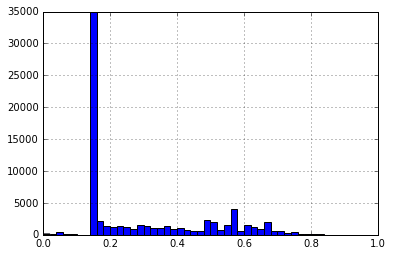

In [54]:
kofi.hist(bins=50)

In [55]:
kofiv = kofi * df.loc[:, ver]
kofiv = kofiv.loc[kofiv>0]

kofis = kofi * ~(df.loc[:, ver].replace(np.nan, True))
kofis = kofis.loc[kofis>0]

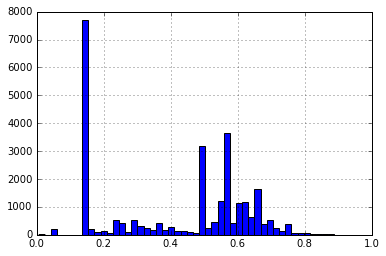

In [56]:
kofis.hist(bins=50)

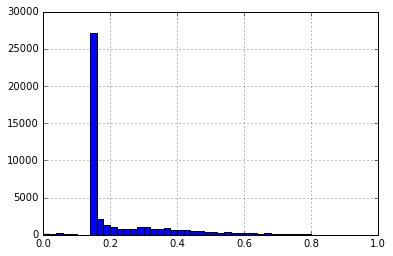

In [57]:
kofiv.hist(bins=50)

In [107]:
kofid = df.groupby([prog, ver]).sum().loc[:, [celk, sml]]
kofid = (100*(1 - kofid.loc[:, sml] / kofid.loc[:, celk])).unstack().round(2)
kofid

Veřejná instituce,False,True
Program,,
CZ.1.01 OP Doprava,68.77,35.69
CZ.1.02 OP Životní prostředí,52.04,40.90
CZ.1.03 OP Podnikání a inovace,59.68,32.42
CZ.1.04 OP Lidské zdroje a zaměstnanost,15.12,15.01
CZ.1.05 OP Výzkum a vývoj pro inovace,30.16,31.37
CZ.1.06 Integrovaný operační program,43.14,21.22
CZ.1.07 OP Vzdělávání pro konkurenceschopnost,15.00,15.00
CZ.1.08 OP Technická pomoc,15.00,15.25
CZ.1.09 ROP NUTS II Severozápad,60.05,29.07


In [108]:
kofid.to_csv('vystupy/tabulky/kofinancovani-program.csv')